In [1]:
import glob
import tqdm
import numpy as np
import pandas as pd
import dask.dataframe as dd
from itertools import combinations

In [2]:
# !pip install --upgrade datasets

In [3]:
path = '/N/project/openalex/slices/subset-1990-2022/dec-2023/'
works_path = 'works'
works_authorships_path = 'works_authorships'
works_referenced_works_path = 'works_referenced_works'

In [4]:
works_dd = dd.read_parquet(path + works_path, calculate_divisions=True) #, npartitions=10)

In [5]:
works_dd.head(30)

,doi,title,publication_year,publication_date,type,type_crossref,cited_by_count,num_authors,num_locations,num_references,language,has_complete_institution_info,has_grant_info,has_keywords,created_date,updated_date
work_id,,,,,,,,,,,,,,,,
9,<NA>,Los peligros de atentado relativos al tráfico ...,2006,2006-01-01,article,journal-article,0,1,1,0,<NA>,False,False,False,2016-06-24,2023-12-16 15:36:26.712
15,10.1007/978-3-642-32197-9_8,Führung und Delegation,2013,2013-01-01,book-chapter,book-chapter,0,2,1,0,de,True,False,True,2016-06-24,2023-12-16 15:38:19.283
23,<NA>,Do patients with solid organ transplants or br...,2012,2012-01-01,article,journal-article,0,3,1,0,en,False,False,True,2016-06-24,2023-12-10 21:46:33.346
79,<NA>,Ethno-medicinal survey among Malayali tribes o...,2009,2009-01-01,article,journal-article,0,2,1,0,en,False,False,True,2016-06-24,2023-12-11 01:10:27.279
87,<NA>,Perspectivas culturales sobre la opinión públi...,2010,2010-01-01,article,journal-article,0,1,1,0,es,False,False,True,2016-06-24,2023-12-17 04:37:19.758
108,<NA>,Rothko's Negative Theology,2013,2013-03-07,article,journal-article,1,1,1,7,en,True,False,True,2016-06-24,2023-12-17 18:19:44.437
143,<NA>,"BOI och litteratursociologi, En undersökning a...",2010,2010-03-03,article,journal-article,0,1,0,0,en,False,False,False,2016-06-24,2023-12-17 10:00:34.629
147,<NA>,El residente en Atención Primaria. Cómo planif...,2008,2008-01-01,article,journal-article,0,2,1,5,en,False,False,True,2016-06-24,2023-12-18 05:08:22.552
166,<NA>,The use of lichen as a bioindicator for the at...,2013,2013-01-01,dissertation,dissertation,0,1,0,0,en,False,False,True,2016-06-24,2023-12-15 13:08:14.230


In [53]:
works_authorships_dd = dd.read_parquet(path + works_authorships_path, calculate_divisions=True)

In [54]:
works_authorships_dd.head()

,work_id,author_position,author_id,author_name,institution_lineage_level,institution_id,institution_name,country_code,is_corresponding,publication_year
6834,206450864,first,5037884393,M. A. Wood,0,<NA>,NaN,<NA>,False,2000
6835,206450864,middle,5049087651,J. Simpson,0,<NA>,NaN,<NA>,False,2000
6836,206450864,middle,5008476879,Steven D. Kawaler,0,<NA>,NaN,<NA>,False,2000
6837,206450864,middle,5031774301,M. S. O’Brien,0,<NA>,NaN,<NA>,False,2000
6838,206450864,middle,5004080568,R. E. Nather,0,<NA>,NaN,<NA>,False,2000


In [8]:
len(works_authorships_dd)

641734880

In [9]:
select_invalid_country_code = works_authorships_dd.country_code.isna()

In [10]:
valid_works = works_authorships_dd[~select_invalid_country_code].compute()

In [11]:
valid_works.head()

,work_id,author_position,author_id,author_name,institution_lineage_level,institution_id,institution_name,country_code,is_corresponding,publication_year
802057,185656491,first,5082005350,Dikran Dikranjan,0,129043915,University of Udine,IT,False,2000
802058,185656491,last,5064525585,Hans-Peter A. Künzi,0,118564535,University of Bern,CH,False,2000
865466,190499972,first,5083994661,Xiaofei Lu,0,1344076864,Center for Applied Linguistics,US,True,2008
1228993,193954201,first,5050961926,Pieter Wesseling,0,98358874,Delft University of Technology,NL,True,2009
1240071,197490598,first,5017890981,Jana Leidenfrost,0,4210092829,Stihl (Germany),DE,True,2013


In [12]:
len(valid_works)

388666681

In [13]:
type(valid_works)

pandas.core.frame.DataFrame

In [ ]:
# valid_works.to_csv('works_valid_country', sep='\t')

In [11]:
valid_works = dd.read_csv('works_valid_country', sep='\t')
print(valid_works.head())
works_br = valid_works[valid_works.country_code == 'BR']

   Unnamed: 0    work_id author_position   author_id          author_name  \
0      802057  185656491           first  5082005350     Dikran Dikranjan   
1      802058  185656491            last  5064525585  Hans-Peter A. Künzi   
2      865466  190499972           first  5083994661           Xiaofei Lu   
3     1228993  193954201           first  5050961926     Pieter Wesseling   
4     1240071  197490598           first  5017890981     Jana Leidenfrost   

   institution_lineage_level  institution_id                institution_name  \
0                          0       129043915             University of Udine   
1                          0       118564535              University of Bern   
2                          0      1344076864  Center for Applied Linguistics   
3                          0        98358874  Delft University of Technology   
4                          0      4210092829                 Stihl (Germany)   

  country_code  is_corresponding  publication_year  
0  

In [ ]:
works_br.head()

In [ ]:
works_br.to_csv('works_br', sep='\t', single_file=True)

In [7]:
!wc -l works_br

8947845 works_br


In [6]:
works_br = pd.read_csv('works_br', sep='\t')
works_br.head()

,Unnamed: 0.1,Unnamed: 0,work_id,author_position,author_id,author_name,institution_lineage_level,institution_id,institution_name,country_code,is_corresponding,publication_year
0,45,1736429,186730611,first,5078262518,Guilherme Ribeiro,0,161460629,Universidade Federal Rural do Rio de Janeiro,BR,True,2014
1,46,1745057,193254257,first,5019917793,Maria Cecília Picinato,0,17974374,Universidade de São Paulo,BR,False,2001
2,174,1632607,206370407,first,5027925855,Eduardo André Perondi,0,4210126369,Polydoro Ernani de São Thiago University Hospital,BR,True,2007
3,529,1508716,222095242,first,5004541578,Reis Lc,0,879563668,Universidade Estadual Paulista (Unesp),BR,False,1996
4,547,643845,181667436,first,5070999666,Carlos Alberto Crespo de Souza,0,4210148245,Fundação Faculdade de Medicina,BR,False,1999


In [15]:
works_br_ids = works_br['work_id'].compute()

In [17]:
works_br_ids.values

array([ 186730611,  193254257,  206370407, ..., 4214878073, 4214878073,
       4214878073])

In [19]:
works_dd.loc[works_br_ids.values, ['title', 'doi']].compute().to_csv('works_br_with_title')

In [20]:
authors_br = works_br['author_id'].unique() # potencialmente br mas nao necessariamente

In [20]:
len(authors_br) # como refinar esse grupo?

1714856

In [21]:
authors_sample = np.random.choice(authors_br, 3000)
np.save('authors_br_sample', authors_sample)
print(authors_sample)

[5040334297 5060517266 5004060964 ... 5031326812 5021090219 5054356649]


In [22]:
authors_sample = set(authors_sample)

In [23]:
all_works_from_authors_br = valid_works[valid_works['author_id'].isin(authors_sample)].compute()

In [24]:
len(all_works_from_authors_br)

41220

In [25]:
all_works_from_authors_br.to_csv('works_authors_br_to_index_sample', sep='\t')

In [28]:
sample_works_ids = all_works_from_authors_br['work_id'].values

In [29]:
# SELECIONAR OS ARTIGOS POR ID NO WORK_DD e salvar
works_dd.loc[sample_works_ids, ['title', 'doi']].compute().to_csv('works_br_sample_with_title')

# disruption index

In [30]:
all_works_from_authors_br = pd.read_csv('works_authors_br_to_index_sample', sep='\t')
all_works_from_authors_br.head()

,Unnamed: 0.1,Unnamed: 0,work_id,author_position,author_id,author_name,institution_lineage_level,institution_id,institution_name,country_code,is_corresponding,publication_year
0,1231,1799508,182713280,last,5008526274,Davy Cheng,0,2800925808,London Health Sciences Centre,CA,True,2013
1,1232,1799509,182713280,last,5008526274,Davy Cheng,0,125749732,Western University,CA,True,2013
2,2554,1241126,201280849,middle,5041526616,Howard Gurney,0,2801316944,Cancer Research UK,GB,False,1992
3,4106,132405,186962580,first,5079088684,Eva Faustino da Fonseca de Moura Barbosa,0,879563668,Universidade Estadual Paulista (Unesp),BR,True,2010
4,30305,1646385,2031471846,last,5048392452,Florentino Fdez-Riverola,0,6289922,Universidade de Vigo,ES,True,2009


In [31]:
works_referenced_works = dd.read_parquet(path + works_referenced_works_path)
works_referenced_works.head()

,work_id,referenced_work_id,work_publication_year,referenced_work_publication_year
4572360,4285386458,3699,2023,2008
2623263,197096146,524,2003,2002
306929,2082656788,524,2009,2002
180364,2134233184,4600,2012,2013
6169838,2001377875,4600,2013,2013


In [34]:
#focal_refs = works_referenced_works[works_referenced_works['work_id'] == paper_id].compute()

In [35]:
#focal_refs = set(paper_refs['referenced_work_id'].values)

In [36]:
#focal_cits = works_referenced_works[works_referenced_works['referenced_work_id'] == paper_id].compute()

In [32]:
focal_papers_idxs = set(all_works_from_authors_br['work_id'].values)

In [ ]:
focal_cits = works_referenced_works[works_referenced_works['referenced_work_id'].isin(focal_papers_idxs)].compute()

In [ ]:
focal_cits_idxs = set(focal_cits['work_id'].values)

In [ ]:
potential_cits_of_cits = works_referenced_works[works_referenced_works['work_id'].isin(focal_cits_idxs)].compute()

In [34]:
# potential_cits_of_cits.to_csv('potential_cits_of_cits_sample', sep='\t')
potential_cits_of_cits = dd.read_csv('potential_cits_of_cits_sample', sep='\t')

In [ ]:
len(potential_cits_of_cits)

In [21]:
refs = works_referenced_works[works_referenced_works['work_id'].isin(focal_papers_idxs)].compute()

# authors sample

In [35]:
works_br = pd.read_csv('works_br', sep='\t')
# works_sample = works_br[works_br['author_id'].isin(authors_sample)]

In [36]:
all_works_from_authors_br = pd.read_csv('works_authors_br_to_index_sample', sep='\t')
works_sample = all_works_from_authors_br[all_works_from_authors_br['country_code'] == 'BR']
works_sample.head()

,Unnamed: 0.1,Unnamed: 0,work_id,author_position,author_id,author_name,institution_lineage_level,institution_id,institution_name,country_code,is_corresponding,publication_year
3,4106,132405,186962580,first,5079088684,Eva Faustino da Fonseca de Moura Barbosa,0,879563668,Universidade Estadual Paulista (Unesp),BR,True,2010
5,34900,1614922,2033786716,last,5023045743,Flávio Danni Fuchs,0,4210097146,Hospital de Clínicas de Porto Alegre,BR,False,2010
8,57752,1331005,843593686,middle,5036486224,Renato E. Becker,0,61722147,Universidade do Vale do Rio dos Sinos,BR,False,1999
9,74952,1721847,3203199421,middle,5042206126,Emanuella Margareth Lima Rolim Martins,0,4210090709,Secretaria de Educação de Pernambuco,BR,False,2018
14,119870,1929813,1557383798,last,5054402143,Alessandro Aoki,0,123443094,Universidade Estadual de Maringá,BR,False,2013


In [37]:
focal_papers_idxs_sample = set(works_sample['work_id'].values)
focal_cits_sample = works_referenced_works[works_referenced_works['referenced_work_id'].isin(focal_papers_idxs_sample)].compute()

In [38]:
focal_cits_idxs_sample = set(focal_cits_sample['work_id'].values)

In [39]:
potential_cits_of_cits = dd.read_csv('potential_cits_of_cits_sample', sep='\t')
potential_cits_of_cits_sample = potential_cits_of_cits[potential_cits_of_cits['work_id'].isin(focal_cits_idxs_sample)].compute()

In [40]:
refs = works_referenced_works[works_referenced_works['work_id'].isin(focal_papers_idxs_sample)].compute()

In [49]:
# verificar todos 


In [41]:
def get_disruption_idx1(focal_cits, focal_refs):
    idx_numerator = 0
    test = potential_cits_of_cits_sample[potential_cits_of_cits_sample['work_id'].isin(focal_cits)]
    for paper, paper_refs in test.groupby('work_id'):
        a1 = set(paper_refs['referenced_work_id'].values)
        intersection = a1 & set(focal_refs['referenced_work_id'].values)
        f_it = 1
        if len(intersection) > 0:
            b_it = 1
        else:
            b_it = 0
    
        idx_numerator += -2*f_it*b_it + f_it    
    
    
    idx_denominator = len(focal_cits)
    disruption_idx = idx_numerator/idx_denominator
    return disruption_idx

In [42]:
focal_cits_sample.head()

,work_id,referenced_work_id,work_publication_year,referenced_work_publication_year
3870544,1577828678,1737600104,2015,2014
9297989,2227860561,1737600104,2016,2014
1859968,2221595064,1737600104,2015,2014
102065,2244006981,1737600104,2015,2014
1048001,2560443038,1737600104,2016,2014


In [108]:
paper_disruption = []
i = 0
# ainda nao tem janela de tempo de 5 anos depois do artigo publicado
for paper_id, focal_paper_cits in focal_cits_sample.groupby('referenced_work_id'):
    print(i, end='\r')
    i += 1
    focal_paper_cits = focal_paper_cits[focal_paper_cits['work_publication_year'] - focal_paper_cits['referenced_work_publication_year'] <= 5]
    focal_paper_cits = set(focal_paper_cits['work_id'])
    focal_refs = refs[refs['work_id'] == paper_id]
    
    if len(focal_refs) == 0 or len(focal_paper_cits) < 30:
        continue
    disr_idx = get_disruption_idx1(focal_paper_cits, focal_refs)
    paper_disruption.append((paper_id, disr_idx, len(focal_refs), len(focal_paper_cits)))

In [109]:
len(paper_disruption)

557

In [110]:
temp = pd.DataFrame(paper_disruption)

In [143]:
temp.columns = ['paper_id', 'disruption_index', 'references', 'citations']
# temp.to_csv('papers_id_30cits1.csv')
temp = pd.read_csv('papers_id_30cits1.csv')
temp.head()

,Unnamed: 0,paper_id,disruption_index,references,citations
0,0,176638555,0.200000,232,30
1,1,202036063,0.351351,5,37
2,2,224972536,-0.500000,25,32
3,3,226566298,0.100000,41,40
4,4,252966384,-0.621622,36,37


In [144]:
len(temp)

498

In [145]:
work_title = pd.read_csv('works_br_sample_with_title')
work_title.head()

,work_id,title,doi
0,3002753,Modeling Organizational Architectural Styles i...,NaN
1,40378147,Avaliação de riscos à saúde e intervenção loca...,10.36440/recmvz.v6i1/3.3262
2,19706170,An Attitude Determination System Based on Adap...,10.1007/978-3-642-23226-8_23
3,19706170,An Attitude Determination System Based on Adap...,10.1007/978-3-642-23226-8_23
4,36155770,Multiplicity in the Structure of the Glucurono...,10.1007/978-3-642-76074-7_10


In [146]:
temp_with_title = pd.merge(temp, work_title, left_on='paper_id', right_on='work_id')

In [147]:
temp_with_title.head()

,Unnamed: 0,paper_id,disruption_index,references,citations,work_id,title,doi
0,0,176638555,0.200000,232,30,176638555,Nitric Oxide in the Nervous System,10.1016/b978-0-12-800254-4.00005-2
1,13,1591352166,-0.452381,24,84,1591352166,Visual Inspection for Caries Detection,10.1177/0022034515586763
2,14,1602329895,-0.505155,36,97,1602329895,Impact of oral diseases and disorders on oral ...,10.1111/j.1600-0528.2010.00580.x
3,28,1968266906,-0.387755,40,49,1968266906,Fluorescence-Based Methods for Detecting Carie...,10.1371/journal.pone.0060421
4,29,1970030983,-0.515152,33,33,1970030983,"1,8-cineole (eucalyptol) ameliorates cerulein-...",10.1016/j.lfs.2013.05.009


In [148]:
works_authorships_dd_sample = dd.merge(works_authorships_dd, temp_with_title, left_on='work_id', right_on='paper_id').compute()

In [149]:
works_authorships_dd_sample.head()

,work_id_x,author_position,author_id,author_name,institution_lineage_level,institution_id,institution_name,country_code,is_corresponding,publication_year,Unnamed: 0,paper_id,disruption_index,references,citations,work_id_y,title,doi
0,1975773040,first,5003667690,Felipe Klein Ricachenevsky,0,130442723,Universidade Federal do Rio Grande do Sul,BR,False,2015,36,1975773040,-0.962963,177,54,1975773040,Got to hide your Zn away: Molecular control of...,10.1016/j.plantsci.2015.03.009
1,1975773040,first,5003667690,Felipe Klein Ricachenevsky,0,130442723,Universidade Federal do Rio Grande do Sul,BR,False,2015,36,1975773040,-0.962963,177,54,1975773040,Got to hide your Zn away: Molecular control of...,10.1016/j.plantsci.2015.03.009
2,1975773040,middle,5022508276,Paloma Koprovski Menguer,0,130442723,Universidade Federal do Rio Grande do Sul,BR,False,2015,36,1975773040,-0.962963,177,54,1975773040,Got to hide your Zn away: Molecular control of...,10.1016/j.plantsci.2015.03.009
3,1975773040,middle,5022508276,Paloma Koprovski Menguer,0,130442723,Universidade Federal do Rio Grande do Sul,BR,False,2015,36,1975773040,-0.962963,177,54,1975773040,Got to hide your Zn away: Molecular control of...,10.1016/j.plantsci.2015.03.009
4,1975773040,middle,5022508276,Paloma Koprovski Menguer,0,100288624,John Innes Centre,GB,False,2015,36,1975773040,-0.962963,177,54,1975773040,Got to hide your Zn away: Molecular control of...,10.1016/j.plantsci.2015.03.009


In [150]:
temp2 = []
for paper_id, infos in works_authorships_dd_sample.groupby('paper_id'):
    row = []
    row.append(paper_id)
    row.append(infos.iloc[0]['title'])
    row.append(infos.iloc[0]['disruption_index'])
    row.append(list(infos['author_name']))
    temp2.append(row)

temp2 = pd.DataFrame(temp2)
temp2.columns = ['work_id', 'title', 'disruption_index', 'authors']
temp2.to_csv('works_sample_with_title_and_authors')

In [136]:
len(temp2)

557

In [119]:
# min
# max
# dist
# média por autor

In [120]:
import matplotlib.pyplot as plt

In [121]:
X = [x for x,y,z,w in paper_disruption]
Y = [y for x,y,z,w in paper_disruption]
Z = [z for x,y,z,w in paper_disruption]
W = [w for x,y,z,w in paper_disruption]

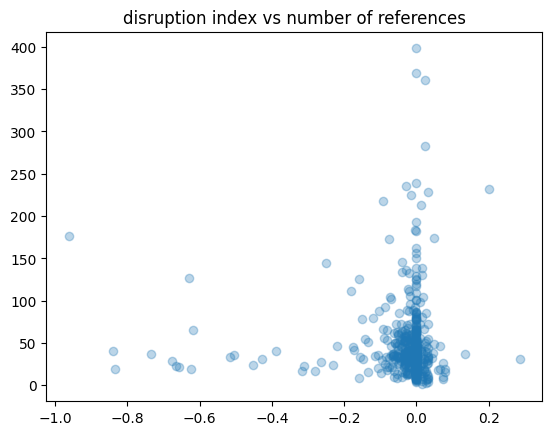

In [122]:
plt.scatter(Y, Z, alpha=0.3)
plt.title('disruption index vs number of references')
plt.show()

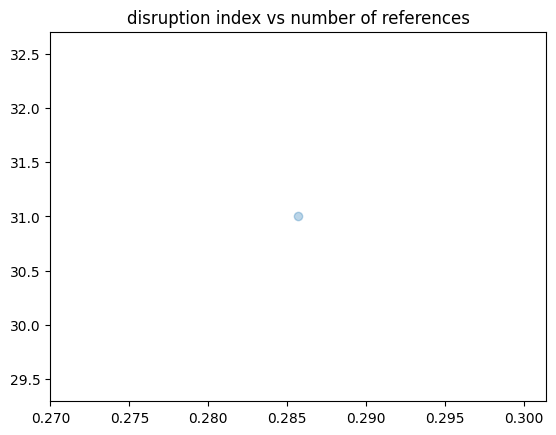

In [123]:
plt.scatter([y for y in Y if y >= 0.25], [z for y,z in zip(Y,Z) if y >= 0.25], alpha=0.3)
plt.title('disruption index vs number of references')
plt.show()

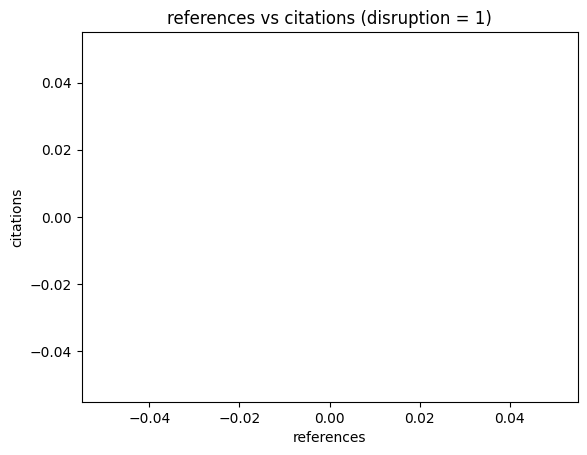

In [124]:
plt.scatter([z for y, z in zip(Y,Z) if y >= 1], [w for y, w in zip(Y,W) if y >= 1], alpha=0.2)
#plt.yscale('log')
plt.title('references vs citations (disruption = 1)')
plt.xlabel('references')
plt.ylabel('citations')
plt.show()

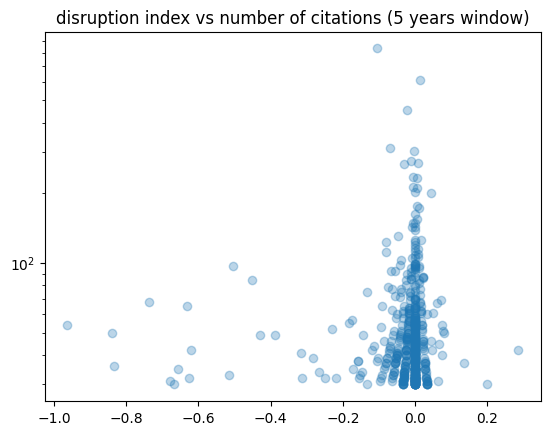

In [127]:
plt.scatter(Y, W, alpha=0.3)
plt.title('disruption index vs number of citations (5 years window)')
plt.yscale('log')
plt.show()

(array([  1.,   1.,   1.,   1.,   3.,   3.,   0.,   2.,   2.,   1.,   3.,
          4.,   7.,  14.,  95., 404.,  12.,   1.,   1.,   1.]),
 array([-0.96296296, -0.9005291 , -0.83809524, -0.77566138, -0.71322751,
        -0.65079365, -0.58835979, -0.52592593, -0.46349206, -0.4010582 ,
        -0.33862434, -0.27619048, -0.21375661, -0.15132275, -0.08888889,
        -0.02645503,  0.03597884,  0.0984127 ,  0.16084656,  0.22328042,
         0.28571429]),
 <BarContainer object of 20 artists>)

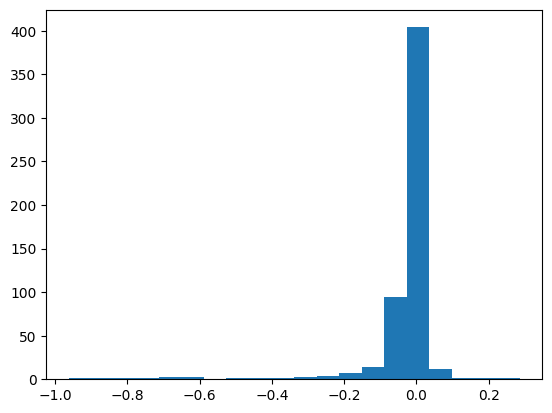

In [126]:
plt.hist(Y, bins=20)

In [65]:
paper_disruption_dict = dict(paper_disruption)

In [66]:
len(paper_disruption_dict)

6824

In [67]:
author_disr_index = []
for author_id, works in works_sample.groupby('author_id'):
    
    print(works)
    author_works = works['work_id']
    temp = []
    for work_id in author_works:
        if work_id in paper_disruption_dict:
            temp.append(paper_disruption_dict[work_id])
    if len(temp) > 0:
        author_disr_index.append((author_id, temp, np.max(temp)))

       Unnamed: 0.1  Unnamed: 0     work_id author_position   author_id  \
10173        470970     1241957  2903698846           first  5000001856   
11722        210611     1074187  2904419477           first  5000001856   
12865         26529       18374  3092093486           first  5000001856   
14818        184624     1749846  2904318224           first  5000001856   
31702         19093     1267510  2997617969           first  5000001856   

               author_name  institution_lineage_level  institution_id  \
10173  Mateus Costa Lucena                          0        41455075   
11722  Mateus Costa Lucena                          0        41455075   
12865  Mateus Costa Lucena                          0        41455075   
14818  Mateus Costa Lucena                          0        41455075   
31702  Mateus Costa Lucena                          0        41455075   

                             institution_name country_code  is_corresponding  \
10173  Universidade Federal de

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



       Unnamed: 0.1  Unnamed: 0     work_id author_position   author_id  \
455          344567      743552  4312336495          middle  5071921267   
1433          78316     1777451  3041020657           first  5071921267   
1446         173617     1006355  4287798685           first  5071921267   
1622         240308       36211  4386113126            last  5071921267   
1944         169177      101184  2108582666           first  5071921267   
...             ...         ...         ...             ...         ...   
28296        471064      269059  2031205493          middle  5071921267   
30385        564003      780088  2748615918           first  5071921267   
30519        265451     1823303  3176597381          middle  5071921267   
31362        418321      137318   325672463            last  5071921267   
31567        241225     1864029  2420928618          middle  5071921267   

                author_name  institution_lineage_level  institution_id  \
455    Evaldo Martins Pir

In [68]:
author_disr_index

[(5000049686, [-1.0, -0.8333333333333334], -0.8333333333333334),
 (5000105467, [-0.3333333333333333, -0.4, -1.0], -0.3333333333333333),
 (5000126724, [-1.0], -1.0),
 (5000277021,
  [1.0,
   0.6,
   0.4,
   -0.6842105263157895,
   0.0,
   -0.8571428571428571,
   -0.6363636363636364,
   -0.6923076923076923,
   -1.0,
   1.0,
   -0.5,
   -0.3333333333333333,
   -1.0,
   -0.8333333333333334,
   0.0,
   -0.6470588235294118,
   -0.6666666666666666,
   -1.0,
   0.14285714285714285,
   -0.7142857142857143,
   -0.25,
   0.0,
   -1.0,
   -0.6363636363636364,
   -0.1111111111111111,
   -0.5555555555555556,
   0.3333333333333333,
   -0.5384615384615384,
   -0.8333333333333334,
   -1.0,
   -0.8,
   -0.7777777777777778,
   -0.6923076923076923,
   -0.6,
   -0.8333333333333334,
   -0.26666666666666666,
   -0.3333333333333333],
  1.0),
 (5000290427, [-1.0, 1.0], 1.0),
 (5000291416, [0.6], 0.6),
 (5000298179, [0.2], 0.2),
 (5000410182, [1.0], 1.0),
 (5000476005, [-0.5555555555555556], -0.5555555555555556

In [88]:
Z = [z for x,y,z in author_disr_index]

NameError: name 'author_disr_index' is not defined

(array([179.,  54.,  91.,  94.,  58., 163.,  77.,  73.,  39., 532.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

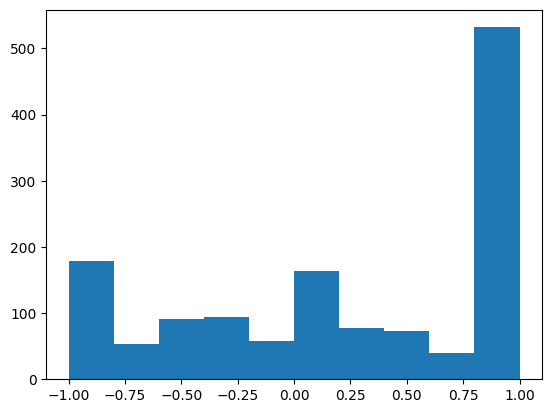

In [70]:
plt.hist(Z)

In [ ]:
# autores br (atualmente sp) OK
# janela de tempo do calculo 5 OK
# olhar papers por ano e qual o idx
# olhar autores conhecidos 
# visualizar disr idx vs número de citações OK
# visualizar disr idx vs número de refs OK
# verificar artigos com muitos autores (e remover, caso ainda estejam na base)